In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Pengmas/AQICN/Data AQICN SO2.xlsx')
data

,date,min,max,median,q1,q3,stdev,count
0,2023-10-16,21.60,22.23,21.83,21.73,22.00,0.167,17
1,2023-10-17,19.25,22.75,21.63,20.01,22.49,1.245,24
2,2023-10-18,18.54,19.32,19.09,18.95,19.23,0.201,24
3,2023-10-19,18.50,20.38,19.59,18.88,19.88,0.551,24
4,2023-10-20,19.92,28.27,20.78,20.49,24.96,2.842,24
...,...,...,...,...,...,...,...,...
555,2025-08-23,20.32,21.83,20.99,20.56,21.64,0.515,24
556,2025-08-24,20.90,21.69,21.43,21.00,21.55,0.269,16
557,2025-08-25,20.84,24.21,22.35,21.33,23.42,1.167,6
558,2025-08-26,10.02,20.41,10.64,10.35,12.42,2.911,24


In [ ]:
NASA = pd.read_excel('/content/drive/MyDrive/Pengmas/NASA/NASA_CL.xlsx')
NASA

,YEAR,DOY,T2M_RANGE,PRECTOTCORR,WS2M,QV2M
0,2023,289,8.07,0.06,4.04,16.73
1,2023,290,8.80,0.01,4.40,16.18
2,2023,291,8.60,0.01,4.19,16.07
3,2023,292,8.43,0.00,3.66,16.25
4,2023,293,8.53,0.00,3.11,16.32
...,...,...,...,...,...,...
674,2025,232,3.97,2.75,1.38,17.20
675,2025,233,5.39,4.82,1.90,17.44
676,2025,234,3.72,2.71,1.66,17.53
677,2025,235,5.85,0.07,2.74,16.94


In [ ]:
NASA['Date_not_cleaned'] = NASA['YEAR'].astype(str) + " " + NASA['DOY'].astype(str)
NASA['Date'] = pd.to_datetime(
    NASA['YEAR'].astype(str) + NASA['DOY'].astype(str),
    format='%Y%j'
)

In [ ]:
NASA.drop(columns=['Date_not_cleaned','YEAR','DOY'], inplace=True)
NASA

,T2M_RANGE,PRECTOTCORR,WS2M,QV2M,Date
0,8.07,0.06,4.04,16.73,2023-10-16
1,8.80,0.01,4.40,16.18,2023-10-17
2,8.60,0.01,4.19,16.07,2023-10-18
3,8.43,0.00,3.66,16.25,2023-10-19
4,8.53,0.00,3.11,16.32,2023-10-20
...,...,...,...,...,...
674,3.97,2.75,1.38,17.20,2025-08-20
675,5.39,4.82,1.90,17.44,2025-08-21
676,3.72,2.71,1.66,17.53,2025-08-22
677,5.85,0.07,2.74,16.94,2025-08-23


In [ ]:
df_final=pd.merge(NASA,data,left_on='Date',right_on='date',how='inner')
df_final.rename(columns={'median':'SO2'},inplace=True)
df_final

,T2M_RANGE,PRECTOTCORR,WS2M,QV2M,Date,date,min,max,SO2,q1,q3,stdev,count
0,8.07,0.06,4.04,16.73,2023-10-16,2023-10-16,21.60,22.23,21.83,21.73,22.00,0.167,17
1,8.80,0.01,4.40,16.18,2023-10-17,2023-10-17,19.25,22.75,21.63,20.01,22.49,1.245,24
2,8.60,0.01,4.19,16.07,2023-10-18,2023-10-18,18.54,19.32,19.09,18.95,19.23,0.201,24
3,8.43,0.00,3.66,16.25,2023-10-19,2023-10-19,18.50,20.38,19.59,18.88,19.88,0.551,24
4,8.53,0.00,3.11,16.32,2023-10-20,2023-10-20,19.92,28.27,20.78,20.49,24.96,2.842,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,3.97,2.75,1.38,17.20,2025-08-20,2025-08-20,20.17,23.44,20.63,20.46,21.77,1.090,24
553,5.39,4.82,1.90,17.44,2025-08-21,2025-08-21,21.56,23.40,22.88,22.79,22.96,0.579,22
554,3.72,2.71,1.66,17.53,2025-08-22,2025-08-22,20.32,21.98,21.68,20.99,21.73,0.577,24
555,5.85,0.07,2.74,16.94,2025-08-23,2025-08-23,20.32,21.83,20.99,20.56,21.64,0.515,24


In [ ]:
df_final.drop(columns=['date','min','max','q1','q3','stdev','count'],inplace=True)
df_final

,T2M_RANGE,PRECTOTCORR,WS2M,QV2M,Date,SO2
0,8.07,0.06,4.04,16.73,2023-10-16,21.83
1,8.80,0.01,4.40,16.18,2023-10-17,21.63
2,8.60,0.01,4.19,16.07,2023-10-18,19.09
3,8.43,0.00,3.66,16.25,2023-10-19,19.59
4,8.53,0.00,3.11,16.32,2023-10-20,20.78
...,...,...,...,...,...,...
552,3.97,2.75,1.38,17.20,2025-08-20,20.63
553,5.39,4.82,1.90,17.44,2025-08-21,22.88
554,3.72,2.71,1.66,17.53,2025-08-22,21.68
555,5.85,0.07,2.74,16.94,2025-08-23,20.99


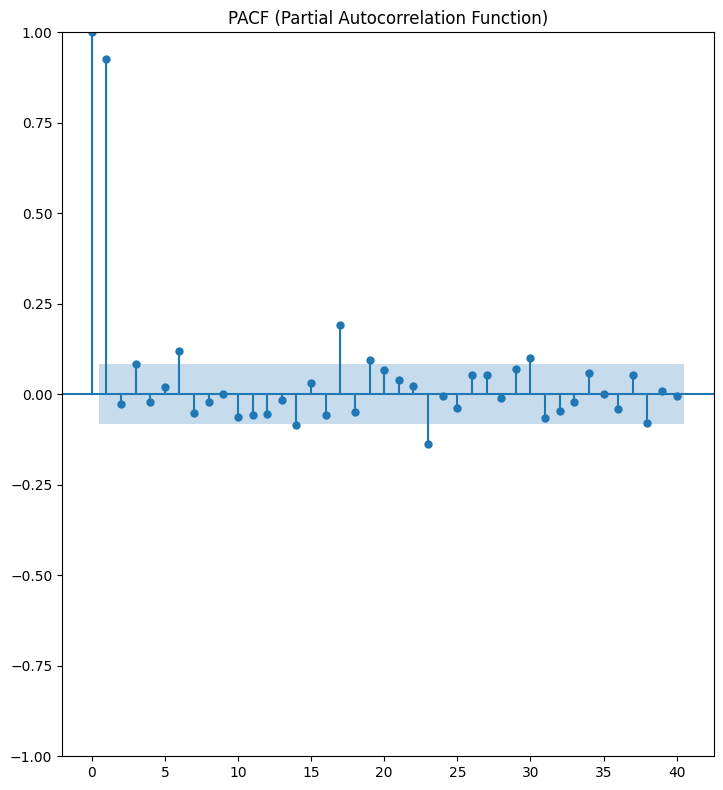

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data_ts = df_final['SO2']
plt.figure(figsize=(14,8))

plt.subplot(1,2,2)
plot_pacf(data_ts, lags=40, method='ywm', ax=plt.gca())
plt.title("PACF (Partial Autocorrelation Function)")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import pacf

def suggest_time_steps(series, max_lag=60, alpha=0.05):
    """
    Cari lag signifikan dari PACF untuk time_steps.
    """
    pacf_values = pacf(series, nlags=max_lag, method='ywmle')
    n = len(series)

    conf_level = 1.96 / np.sqrt(n)

    significant_lags = [lag for lag, val in enumerate(pacf_values)
                        if abs(val) > conf_level and lag != 0]

    return significant_lags, conf_level, pacf_values

lags, threshold, pacf_vals = suggest_time_steps(data['median'], max_lag=40)
print("Batas signifikansi PACF:", round(threshold, 3))
print("Lag signifikan:", lags)

if len(lags) > 0:
    print(f"Rekomendasi time_steps untuk LSTM: {max(lags)}")
else:
    print("Gunakan default (misal 7, 14, atau 30).")

Batas signifikansi PACF: 0.083
Lag signifikan: [1, 3, 6, 14, 17, 19, 23, 30]
Rekomendasi time_steps untuk LSTM: 30


In [ ]:
df_supervised = pd.DataFrame()
df_supervised['y'] = data_ts.values

# lag 1-3 dari nilai y
for i in range(1, 3):
  df_supervised[f'lag_{i}'] = data_ts.shift(i)

# buang data sebelum lag 3
df_supervised = df_supervised.dropna().reset_index(drop=True)

print("Data asli:", len(data_ts))
print("Data setelah pakai lag 25:", len(df_supervised))

Data asli: 557
Data setelah pakai lag 25: 555


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer

# split 60/20/20
total_len = len(df_supervised)
train_size = int(total_len * 0.6)
val_size   = int(total_len * 0.2)
test_size  = total_len - train_size - val_size  # sisanya 20%

train = df_supervised.iloc[:train_size]
val   = df_supervised.iloc[train_size:train_size+val_size]
test  = df_supervised.iloc[train_size+val_size:]

print("Train shape:", train.shape)
print("Validation shape:", val.shape)
print("Test shape:", test.shape)

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_val   = scaler.transform(val)
scaled_test  = scaler.transform(test)

X_train, y_train = scaled_train[:, 1:], scaled_train[:, 0]
X_val, y_val     = scaled_val[:, 1:], scaled_val[:, 0]
X_test, y_test   = scaled_test[:, 1:], scaled_test[:, 0]

# bentuk 3D untuk LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val   = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape, "y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

Train shape: (333, 3)
Validation shape: (111, 3)
Test shape: (111, 3)
X_train shape: (333, 2, 1) y_train shape: (333,)
X_val shape: (111, 2, 1) y_val shape: (111,)
X_test shape: (111, 2, 1) y_test shape: (111,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_lstm(units=50, dropout=0.2, lr=0.001):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    return model

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_solution(solution):
    units = int(solution[0])         # jumlah neuron LSTM
    dropout = solution[1]            # dropout rate
    lr = solution[2]                 # learning rate
    epochs = int(solution[3])        # jumlah epoch

    model = build_lstm(units=units, dropout=dropout, lr=lr)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

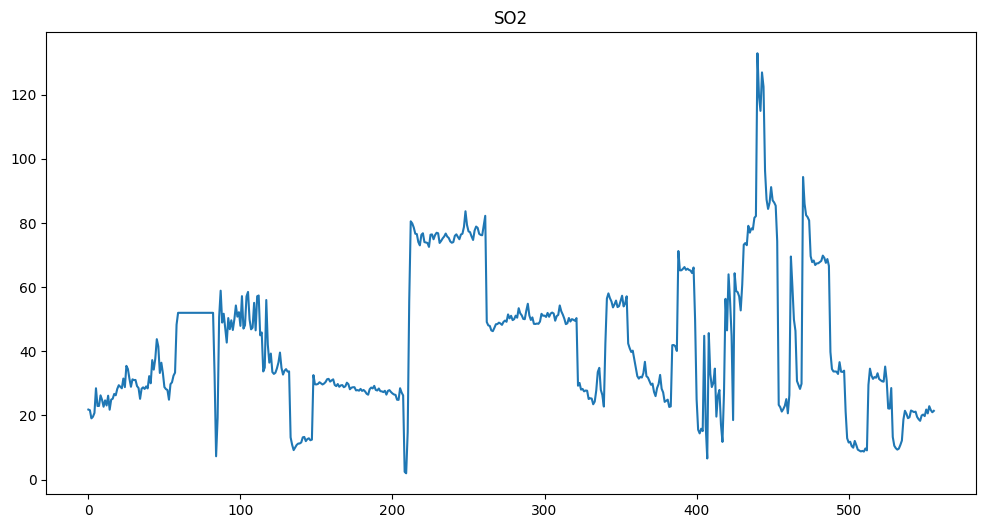

In [ ]:
df_final['SO2'].plot(figsize=(12,6), title="SO2")
plt.show()

In [ ]:
try:
  from deap import base, creator, tools, algorithms
except:
  !pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 5.4 MB/s eta 0:00:00


In [ ]:
import random
from deap import base, creator, tools, algorithms

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("units", random.randint, 50, 128)         # jumlah neuron
toolbox.register("dropout", random.uniform, 0.2, 0.4)      # dropout
toolbox.register("lr", random.uniform, 0.001, 0.005)       # learning rate
toolbox.register("epochs", random.randint, 30, 60)         # epoch

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.units, toolbox.dropout, toolbox.lr, toolbox.epochs), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_ind(individual):
    return (evaluate_solution(individual),)

toolbox.register("evaluate", eval_ind)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# generate GA
population = toolbox.population(n=10)   # ukuran populasi
NGEN = 6                                # jumlah generasi
hof = tools.HallOfFame(1)

algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2,
                    ngen=NGEN, halloffame=hof, verbose=True)

print("Best hyperparameters:", hof[0])

# train dengan best parameter
best_params = hof[0]
final_model = build_lstm(units=int(best_params[0]), dropout=best_params[1], lr=best_params[2])
history = final_model.fit(X_train, y_train,
                          validation_data=(X_val, y_val),
                          epochs=int(best_params[3]),
                          batch_size=32, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
gen	nevals
0  	10    


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1  	5     


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2  	7     


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3  	5     


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4  	8     


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
5  	7     


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6  	3     
Best hyperparameters: [117.1137815128417, 0.27730430167901127, 0.005039199424224696, 43.50212116026937]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Evaluasi Model:
MAE  : 0.0781
RMSE : 0.1325
R²   : 0.8104


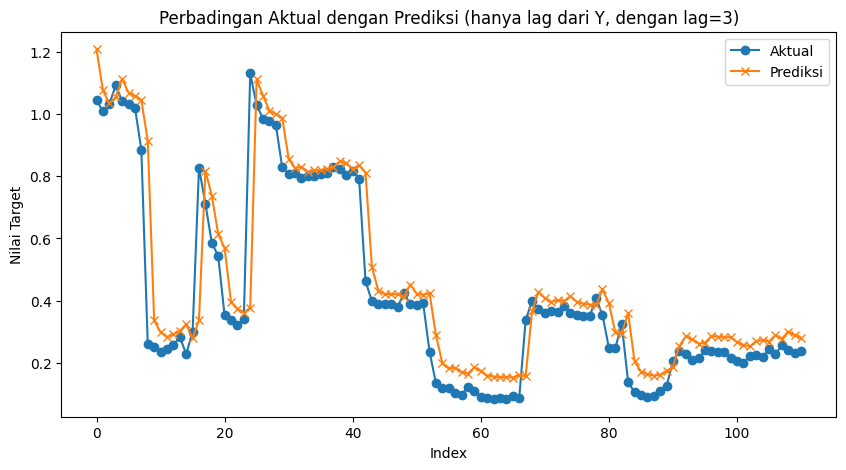

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

y_pred = final_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Model:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test, label="Aktual", marker='o')
plt.plot(y_pred, label="Prediksi", marker='x')
plt.title("Perbadingan Aktual dengan Prediksi (hanya lag dari Y, dengan lag=3)")
plt.xlabel("Index")
plt.ylabel("Nilai Target")
plt.legend()
plt.show()

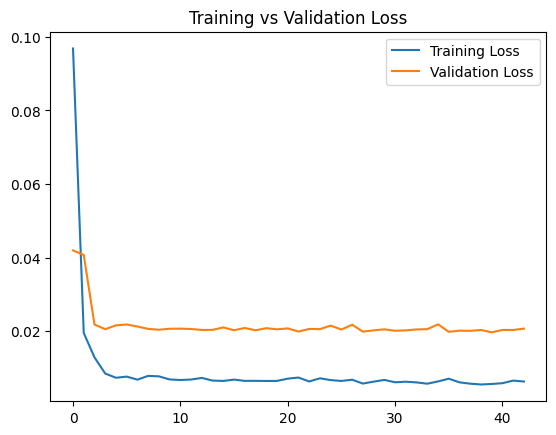

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()